# LFC Data Analysis: LFC Managers

See Terry's blog [Being Liverpool Manager](http://www.lfcsorted.com/2015/10/being-liverpool-manager.html) for a discussion of the data analysis.

This notebook analyses the performance of Liverpool's most recent managers at 4th October 2015.

The analysis uses [IPython Notebook](http://ipython.org/notebook.html), [python](https://www.python.org/), [pandas](http://pandas.pydata.org/) and [matplotlib](http://matplotlib.org/) to explore the data. 

## Set-up

Import the modules needed for the analysis.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys
import collections
from datetime import datetime
from __future__ import division

# enable inline plotting
%matplotlib inline

Print version numbers.

In [2]:
print 'python version: {}'.format(sys.version)
print 'pandas version: {}'.format(pd.__version__)
print 'matplotlib version: {}'.format(mpl.__version__)
print 'numpy version: {}'.format(np.__version__)

python version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
pandas version: 0.16.2
matplotlib version: 1.4.3
numpy version: 1.9.2


## Load the data into a dataframes and munge

#### Create dataframe of LFC games
Data source: lfchistory.net

In [3]:
from datetime import datetime
DATA_EXTRACT_DATE = '4th Oct 2015'
LFC_GAMES_CSV_FILE = 'data\lfc_games_official_4thOct2015.csv' # output csv file to contain official games (excludes friendlies)
dflfc_games = pd.read_csv(LFC_GAMES_CSV_FILE, parse_dates=['Date'], 
                         date_parser=lambda x: datetime.strptime(x, '%d.%m.%Y'))

# show shape
dflfc_games.shape

(5473, 9)

In [4]:
# check data types
dflfc_games.dtypes

Season                 object
Date           datetime64[ns]
Score                  object
GF                      int64
GA                      int64
Result                 object
Opposition             object
Stadium                object
Competition            object
dtype: object

In [5]:
dflfc_games.head()

,Season,Date,Score,GF,GA,Result,Opposition,Stadium,Competition
0,1892-1893,1892-09-03 00:00:00,8 - 0,8,0,W,Higher Walton,Anfield,Lancashire League
1,1892-1893,1892-09-24 00:00:00,4 - 0,4,0,W,Bury,Anfield,Lancashire League
2,1892-1893,1892-10-01 00:00:00,3 - 1,3,1,W,West Manchester,Anfield,Lancashire League
3,1892-1893,1892-10-15 00:00:00,4 - 0,4,0,W,Nantwich,Nantwich Road,FA Cup 1st Qualifier
4,1892-1893,1892-10-22 00:00:00,5 - 0,5,0,W,Higher Walton,Moon's Mill,Lancashire League


In [6]:
# check dates, 1st league game vs ManU in 2011-12 is 15th Oct 2011, 2nd is 11th Feb 2012 (not Nov!)
dflfc_games[(dflfc_games.Season == '2011-2012') & (dflfc_games.Opposition == 'Manchester United')]

,Season,Date,Score,GF,GA,Result,Opposition,Stadium,Competition
5265,2011-2012,2011-10-15,1 - 1,1,1,D,Manchester United,Anfield,Premier League
5285,2011-2012,2012-01-28,2 - 1,2,1,W,Manchester United,Anfield,FA Cup 4th round
5288,2011-2012,2012-02-11,1 - 2,1,2,L,Manchester United,Old Trafford,Premier League


## Analyse the data

Ask a question and find the answer!

Show Liverpool's win % under Rodgers in Premiership, at the DATA_EXTRACT_DATE

In [7]:
df_rodgers_wins = dflfc_games[(dflfc_games.Competition == 'Premier League') & (dflfc_games.Season >= '2012-2013') & (dflfc_games.Result == 'W')][['Season', 'Result']].groupby('Season').count()
df_rodgers_wins.columns = ['Wins']
df_rodgers_wins['TotGames'] = 38
df_rodgers_wins.ix['2015-2016']['TotGames'] = dflfc_games[(dflfc_games.Season == '2015-2016') & (dflfc_games.Competition == 'Premier League')].Result.count()
df_rodgers_wins.ix['Total'] = df_rodgers_wins.sum(axis=0)
df_rodgers_wins['Win%'] = np.round(100*(df_rodgers_wins.Wins/df_rodgers_wins.TotGames), 1)
print 'Rodgers record: Win percentage per season, at {}'.format(DATA_EXTRACT_DATE)
df_rodgers_wins

Rodgers record: Win percentage per season, at 4th Oct 2015


,Wins,TotGames,Win%
Season,,,
2012-2013,16,38,42.1
2013-2014,26,38,68.4
2014-2015,18,38,47.4
2015-2016,3,8,37.5
Total,63,122,51.6


In [8]:
# produce same table using dates of manager's time in charge
BR_START = pd.datetime(2012, 6, 1)
BR_END = pd.datetime(2015, 10, 4) # stop press!
df_rodgers_wins = dflfc_games[(dflfc_games.Competition == 'Premier League') & 
                              (dflfc_games.Date >= BR_START) & (dflfc_games.Date <= BR_END) & 
                              (dflfc_games.Result == 'W')][['Season', 'Result']].groupby('Season').count()
df_rodgers_wins.columns = ['Wins']
df_rodgers_wins['TotGames'] = 38
df_rodgers_wins.ix['2015-2016']['TotGames'] = dflfc_games[(dflfc_games.Season == '2015-2016') & 
                                                          (dflfc_games.Competition == 'Premier League')].Result.count()
df_rodgers_wins.ix['Total'] = df_rodgers_wins.sum(axis=0)
df_rodgers_wins['Win%'] = np.round(100*(df_rodgers_wins.Wins/df_rodgers_wins.TotGames), 1)
print 'Rodgers record: Win percentage per season, at {}'.format(DATA_EXTRACT_DATE)
df_rodgers_wins

Rodgers record: Win percentage per season, at 4th Oct 2015


,Wins,TotGames,Win%
Season,,,
2012-2013,16,38,42.1
2013-2014,26,38,68.4
2014-2015,18,38,47.4
2015-2016,3,8,37.5
Total,63,122,51.6


In [9]:
# define start and end dates for a selection of managers
# only include full seasons before 2015 season
manager_dict = collections.OrderedDict()
manager_dict['Brendan Rodgers'] = [pd.datetime(2012, 6, 1), pd.datetime(2015, 10, 4)]
manager_dict['Kenny Dalglish 2'] = [pd.datetime(2011, 1, 8), pd.datetime(2012, 5, 16)]
manager_dict['Roy Hodgson'] = [pd.datetime(2010, 7, 1), pd.datetime(2011, 1, 8)]
manager_dict['Rafael Benitez'] = [pd.datetime(2004, 6,16), pd.datetime(2010, 6, 3)]

In [10]:
for k,v in manager_dict.items():
    print k, v

Brendan Rodgers [datetime.datetime(2012, 6, 1, 0, 0), datetime.datetime(2015, 10, 4, 0, 0)]
Kenny Dalglish 2 [datetime.datetime(2011, 1, 8, 0, 0), datetime.datetime(2012, 5, 16, 0, 0)]
Roy Hodgson [datetime.datetime(2010, 7, 1, 0, 0), datetime.datetime(2011, 1, 8, 0, 0)]
Rafael Benitez [datetime.datetime(2004, 6, 16, 0, 0), datetime.datetime(2010, 6, 3, 0, 0)]


In [11]:
# show win% (etc) for all recent managers in manager dict
df_mgr_sum = pd.DataFrame() # new dataframe for summary
for manager, (start_date, end_date) in manager_dict.iteritems():
    print '\n\nManager: {} \nFrom: {}, To: {}\n'.format(manager, start_date.strftime('%d %b %Y'), end_date.strftime('%d %b %Y'))
    
    df_mgr = dflfc_games[(dflfc_games.Competition == 'Premier League') & 
                              (dflfc_games.Date >= start_date) & (dflfc_games.Date <= end_date)]\
                                    [['Season', 'Result', 'Score']].groupby(['Season', 'Result']).count().unstack()

    df_mgr.columns = df_mgr.columns.droplevel()
    del df_mgr.columns.name
    df_mgr = df_mgr.reindex_axis(['W', 'D', 'L'], axis=1)
    df_mgr['TotGames'] = -1 # dummy value for new column

    for s in df_mgr.index.values:
        df_mgr.ix[s]['TotGames'] = dflfc_games[(dflfc_games.Season == s) &
                                                    (dflfc_games.Competition == 'Premier League') &
                                                    (dflfc_games.Date >= start_date) & 
                                                    (dflfc_games.Date <= end_date)].Result.count()
    df_mgr.ix['Total'] = df_mgr.sum(axis=0)
    df_mgr['W%'] = np.round(100*(df_mgr.W/df_mgr.TotGames), 1)
    df_mgr['D%'] = np.round(100*(df_mgr.D/df_mgr.TotGames), 1)
    df_mgr['L%'] = np.round(100*(df_mgr.L/df_mgr.TotGames), 1)
    df_mgr['TotPoints'] = df_mgr.D + df_mgr.W*3
    df_mgr['PointsPerGame'] = np.round(df_mgr.TotPoints/df_mgr.TotGames, 1)
    
    df_mgr_sum.set_value(manager, 'W%', df_mgr.ix['Total']['W%'])
    df_mgr_sum.set_value(manager, 'PointsPerGame', df_mgr.ix['Total']['PointsPerGame'])
    print df_mgr



Manager: Brendan Rodgers 
From: 01 Jun 2012, To: 04 Oct 2015

            W   D   L  TotGames    W%    D%    L%  TotPoints  PointsPerGame
Season                                                                     
2012-2013  16  13   9        38  42.1  34.2  23.7         61            1.6
2013-2014  26   6   6        38  68.4  15.8  15.8         84            2.2
2014-2015  18   8  12        38  47.4  21.1  31.6         62            1.6
2015-2016   3   3   2         8  37.5  37.5  25.0         12            1.5
Total      63  30  29       122  51.6  24.6  23.8        219            1.8


Manager: Kenny Dalglish 2 
From: 08 Jan 2011, To: 16 May 2012

            W   D   L  TotGames    W%    D%    L%  TotPoints  PointsPerGame
Season                                                                     
2010-2011  10   3   5        18  55.6  16.7  27.8         33            1.8
2011-2012  14  10  14        38  36.8  26.3  36.8         52            1.4
Total      24  13  19        56  42

In [12]:
df_mgr_sum

,W%,PointsPerGame
Brendan Rodgers,51.6,1.8
Kenny Dalglish 2,42.9,1.5
Roy Hodgson,35.0,1.2
Rafael Benitez,55.3,1.9


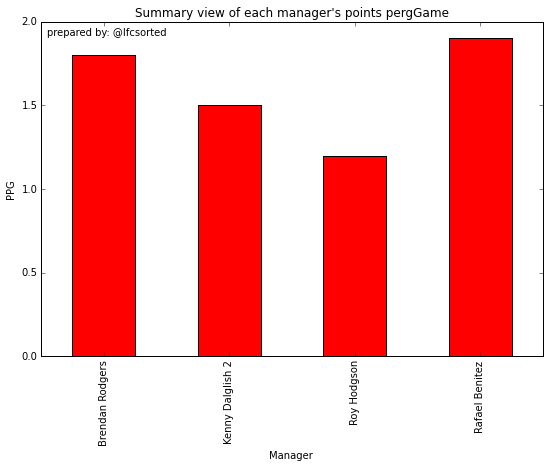

In [13]:
# plot as bar chart
fig = plt.figure(figsize=(9, 6))
ax = df_mgr_sum['PointsPerGame'].plot(kind='bar', color='r')
ax.set_title("Summary view of each manager's points pergGame")
ax.set_xlabel('Manager')
ax.set_ylabel('PPG')
ax.text(-0.45, 1.92, 'prepared by: @lfcsorted', bbox=dict(facecolor='none', edgecolor='none', alpha=0.6))
plt.show()

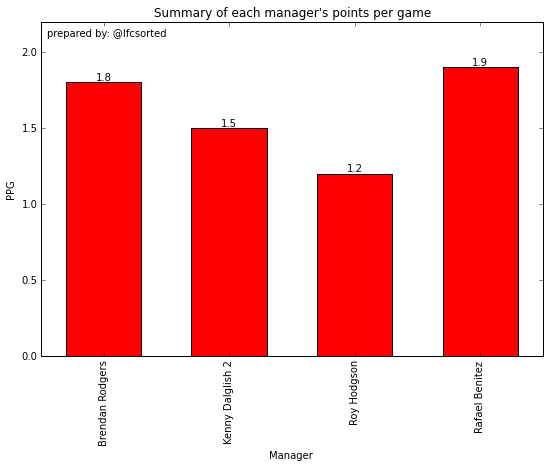

In [14]:
# plot as bar chart, with PPG above the bar
fig = plt.figure(figsize=(9, 6))
x = x = range(1, len(df_mgr_sum)+1)
y = df_mgr_sum['PointsPerGame'].values
ax = plt.bar(x, y, align='center', color='r', width=0.6)

# plot ppg as text above bar
for xidx, yt in enumerate(y):
    xt = xidx + 1
    plt.annotate(str(yt), xy=(xt,yt), xytext=(xt, yt), va="bottom", ha="center")
    
# add labels
plt.xticks(x, df_mgr_sum.index.values, rotation='vertical')
plt.ylim((0, 2.2))
plt.title("Summary of each manager's points per game")
plt.xlabel('Manager')
plt.ylabel('PPG')
plt.text(0.55, 2.1, 'prepared by: @lfcsorted', bbox=dict(facecolor='none', edgecolor='none', alpha=0.6))

# plot
plt.show()
fig.savefig('ManagervsPPG.png', bbox_inches='tight')